## Exercise 1

We have
$$\begin{split}
L(h) 
&= \mathbb{P}(h(X) \neq Y) \\
&= \int \mathbb{P}(h(X) \neq Y | X = x) f(x) dx \\
&= \int (\mathbb{P}(h(X) = 1, Y = 0 | X = x) + \mathbb{P}(h(X) = 0, Y = 1 | X = x)) f(x) dx \\
&= \int (\mathbb{P}(h(X) = 1 | X = x) \mathbb{P}(Y = 0 | X = x) + \mathbb{P}(h(X) = 0 | X = x) \mathbb{P}(Y = 1 | X = x)) f(x) dx \\
&= \int (\mathbb{P}(h(X) = 1 | X = x) (1 - \mathbb{P}(Y = 1 | X = x)) + (1 - \mathbb{P}(h(X) = 0 | X = x)) \mathbb{P}(Y = 1 | X = x)) f(x) dx \\
&= \int (\mathbb{P}(h(X) = 1 | X = x) - \mathbb{P}(h(X) = 1 | X = x) \mathbb{P}(Y = 1 | X = x)) + \mathbb{P}(Y = 1 | X = x) - \mathbb{P}(h(X) = 0 | X = x) \mathbb{P}(Y = 1 | X = x)) f(x) dx \\
&= \int (\mathbb{P}(Y = 1 | X = x) + \mathbb{P}(h(X) = 1 | X = x)(1 - 2 \mathbb{P}(Y = 1 | X = x))) f(x) dx, \\
\end{split}$$
where we assumed that the classification is performed without the knowledge of the true outcome $Y$, therefore $\mathbb{P}(h(X) = i, Y = j | X = x) = \mathbb{P}(h(X) = i | X = x) \mathbb{P}(Y = j | X = x)$.

Consider the term $\mathbb{P}(h(X) = 1 | X = x)(1 - 2 \mathbb{P}(Y = 1 | X = x))$. If $\mathbb{P}(Y = 1 | X = x) > \frac{1}{2}$, then the term is minimised when $\mathbb{P}(h(X) = 1 | X = x) = 1$. If $\mathbb{P}(Y = 1 | X = x) < \frac{1}{2}$, the term is minimised when $\mathbb{P}(h(X) = 1 | X = x) = 0$. Therefore $L(h)$ is minimised by setting
$$h(x) = \begin{cases}
1, &\text{if } \mathbb{P}(Y = 1 | X = x) > \frac{1}{2} \\
0, &\text{otherwise} \\
\end{cases}$$
which is exactly the Bayes classification rule. Thus $L(h^*) \leq L(h)$ for any $h$.

## Exercise 2

Using the formulation (22.6) of the Bayes classification rule, we set $h^*(x) = 1$ when
$$\pi_1 f_1(x) > \pi_0 f_0(x).$$
For multivariate normal $f_k$, this yields
$$\pi_1 \frac{1}{(2\pi)^{d / 2} |\Sigma_1|^{1/2}} \exp\left\{-\frac{r_1^2}{2}\right\} > \pi_0 \frac{1}{(2\pi)^{d / 2} |\Sigma_0|^{1/2}} \exp\left\{-\frac{r_0^2}{2}\right\},$$
where we denoted
$$r_i^2 = (x - \mu_i)^T \Sigma_i^{-1}(x - \mu_i).$$
Taking the logarithm on both sides, we obtain
$$\log \pi_1 - \frac{d}{2} \log(2\pi) - \frac{1}{2}\log |\Sigma_1| -\frac{r_1^2}{2} > \log \pi_0 - \frac{d}{2} \log(2\pi) - \frac{1}{2} \log |\Sigma_0| -\frac{r_0^2}{2},$$
or equivalently
$$2 \log \pi_1 - \log |\Sigma_1| - r_1^2 > 2 \log \pi_0 - \log |\Sigma_0| - r_0^2.$$
Rearranging the terms finally gives us
$$r_1^2 < r_0^2 + 2 \log \frac{\pi_1}{\pi_0} + \log \frac{|\Sigma_0|}{|\Sigma_1|}.$$

## Exercise 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, KFold

In [2]:
data = pd.read_csv('spam.dat', sep='\\s+', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


There are duplicated rows in the data:

In [3]:
data.duplicated().sum()

np.int64(391)

We drop the duplicated rows:

In [4]:
data = data[~data.duplicated()]

(a)

In [5]:
class Model:
    def fit(self, X, y):
        raise NotImplementedError

    def predict(self, X):
        raise NotImplementedError

In [6]:
def loglik_clusters(X, loglik_func, clusters, n):
    return np.stack([loglik_func(X, clusters, cluster, n) for cluster in clusters], axis=1)

In [7]:
class BayesianModel(Model):
    def __init__(self, loglik_func):
        self.loglik_func = loglik_func
    
    def fit(self, X, y):
        self.n = X.shape[0]
        self.y_distinct = np.unique(y)
        self.clusters = [X[y == y_val] for y_val in self.y_distinct]
        return self

    def predict(self, X):
        loglik = loglik_clusters(X, self.loglik_func, self.clusters, self.n)
        return self.y_distinct[np.argmax(loglik, axis=1)]

    def get_params(self, deep=True):
        return {
            'loglik_func': self.loglik_func,
        }

In [8]:
def error_rate(conf_matrix):
    return 1 - np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

In [9]:
def evaluate(X_train, y_train, model, X_test, y_test):
    y_pred = model.fit(X_train, y_train).predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return y_pred, conf_matrix, error_rate(conf_matrix)

In [10]:
cluster_col = 57
X = data.drop(columns=cluster_col, axis=1)
y = data.iloc[:, cluster_col]

#### Linear discriminant analysis

In [11]:
def loglik_lda(X, clusters, cluster, n):
    # the pooled covariance matrix
    S = sum([cluster.shape[0] * cluster.cov() for cluster in clusters]) / n
    pi = cluster.shape[0] / n
    return stats.multivariate_normal.logpdf(X, mean=cluster.mean(), cov=S, allow_singular=True) + np.log(pi)

In [12]:
y_pred, conf_matrix, err_rate = evaluate(X, y, BayesianModel(loglik_lda), X, y)

The confusion matrix:

In [13]:
conf_matrix

array([[2422,  109],
       [ 362, 1317]])

The error rate:

In [14]:
err_rate

np.float64(0.11187648456057009)

Cross-validation error rate:

In [15]:
K = 5

In [16]:
kf = KFold(n_splits=K, shuffle=False)

In [17]:
1 - cross_val_score(estimator=BayesianModel(loglik_lda), X=X, y=y, cv=kf, n_jobs=-1, scoring='accuracy').mean()

np.float64(0.1859857482185273)

We can obtain the same results using `LinearDiscriminantAnalysis` from `scikit-learn`:

In [18]:
y_pred_sk = LinearDiscriminantAnalysis().fit(X, y).predict(X)
np.all(y_pred_sk == y_pred)

np.True_

In [19]:
1 - cross_val_score(estimator=LinearDiscriminantAnalysis(), X=X, y=y, cv=kf, n_jobs=-1, scoring='accuracy').mean()

np.float64(0.1859857482185273)

#### Quadratic discriminant analysis

In [20]:
def loglik_qda(X, clusters, cluster, n):
    pi = cluster.shape[0] / n
    return stats.multivariate_normal.logpdf(X, mean=cluster.mean(), cov=cluster.cov(), allow_singular=True) + np.log(pi)

In [21]:
y_pred, conf_matrix, err_rate = evaluate(X, y, BayesianModel(loglik_qda), X, y)

The confusion matrix:

In [22]:
conf_matrix

array([[1986,  545],
       [  86, 1593]])

The error rate:

In [23]:
err_rate

np.float64(0.14988123515439433)

Cross-validation error rate:

In [24]:
1 - cross_val_score(estimator=BayesianModel(loglik_qda), X=X, y=y, cv=kf, n_jobs=-1, scoring='accuracy').mean()

np.float64(0.15890736342042755)

The prediction results do not match the output from `QuadraticDiscriminantAnalysis` in `scikit-learn`:

In [25]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)
y_pred_sk = qda.predict(X)
np.all(y_pred_sk == y_pred)

np.False_

An alternative implementation that uses singular value decomposition to invert the covariance matrix:

In [26]:
def loglik_qda_svd(X, clusters, cluster, n):
    pi = cluster.shape[0] / n
    mu = cluster.mean()
    _, S, Vt = np.linalg.svd(cluster - mu, full_matrices=False)
    S = S / np.sqrt(cluster.shape[0] - 1)
    X2 = (X - mu) @ (Vt.T / S)
    norm2 = np.sum(X2 ** 2, axis=1)
    u = np.sum(np.log(S))
    return -0.5 * norm2 - u + np.log(pi)

In [27]:
y_pred, conf_matrix, err_rate = evaluate(X, y, BayesianModel(loglik_qda_svd), X, y)

The confusion matrix:

In [28]:
conf_matrix

array([[1931,  600],
       [  75, 1604]])

The error rate:

In [29]:
err_rate

np.float64(0.16033254156769594)

Now the predictions match `scikit-learn`:

In [30]:
np.all(y_pred_sk == y_pred)

np.True_

Cross-validation error rate:

In [31]:
1 - cross_val_score(estimator=BayesianModel(loglik_qda_svd), X=X, y=y, cv=kf, n_jobs=-1, scoring='accuracy').mean()

np.float64(0.1691211401425179)

#### Logistic regression

We use the logistic regression implementation from `statsmodels`.

In [32]:
import statsmodels.api as sm

In [33]:
class LogisticRegressionModel(Model):
    def fit(self, X, y):
        self.fitted_model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial()).fit()
        return self

    def predict(self, X):
        return np.round(self.fitted_model.predict(sm.add_constant(X))).astype(int)

    def get_params(self, deep=True):
        return {}

In [34]:
y_pred, conf_matrix, err_rate = evaluate(X, y, LogisticRegressionModel(), X, y)

The confusion matrix:

In [35]:
conf_matrix

array([[2413,  118],
       [ 184, 1495]])

The error rate:

In [36]:
err_rate

np.float64(0.0717339667458432)

Cross-validation error rate:

In [37]:
1 - cross_val_score(estimator=LogisticRegressionModel(), X=X, y=y, cv=kf, n_jobs=-1, scoring='accuracy').mean()

/home/artem/git/all-of-statistics/.venv/lib/python3.13/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/artem/git/all-of-statistics/.venv/lib/python3.13/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


np.float64(0.13919239904988134)

#### Decision tree

In [38]:
from joblib import Parallel, delayed

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [40]:
min_leaf_sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 250, 500, 750, 1000, 1500, 2000, 2500]

In [41]:
err_rates = 1 - np.array([cross_val_score(
    estimator=DecisionTreeClassifier(min_samples_leaf=m),
    X=X,
    y=y,
    cv=kf,
    n_jobs=-1,
    scoring='accuracy',
).mean() for m in min_leaf_sizes])

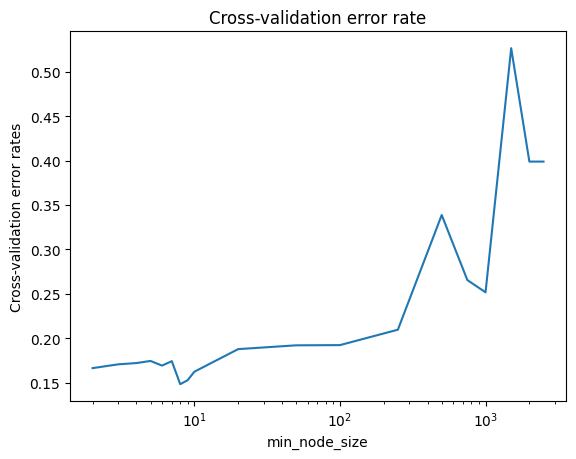

In [42]:
fig, ax = plt.subplots()
ax.plot(min_leaf_sizes, err_rates);
ax.set_xscale('log');
ax.set_xlabel('min_node_size');
ax.set_ylabel('Cross-validation error rates');
ax.set_title('Cross-validation error rate');

The smallest error is achieved at:

In [43]:
m_opt = min_leaf_sizes[np.argmin(err_rates)]
m_opt

8

In [44]:
clf = DecisionTreeClassifier(min_samples_leaf=m_opt).fit(X, y)

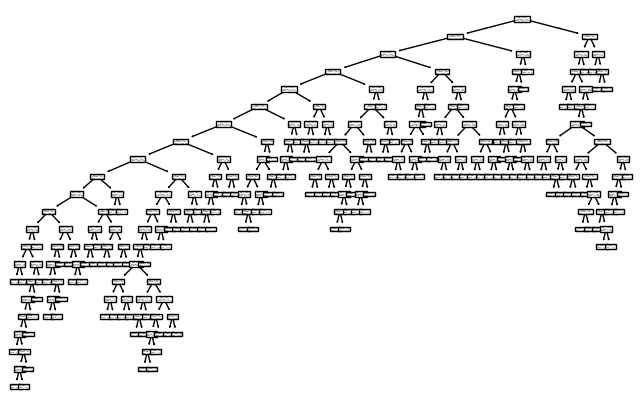

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))
plot_tree(clf, feature_names=X.columns, ax=ax);

(b) Cross-validation was performed in (a).

(c) We use the procedure in Example 10.8 to compare the means between groups.

In [46]:
import scipy.stats as stats

In [47]:
def mean_var(X):
    return np.mean(X), np.var(X, ddof=1), X.shape[0]

In [48]:
def mean_equality_p_value(i):
    mu1, s1, n1 = mean_var(X[y == 0][i])
    mu2, s2, n2 = mean_var(X[y == 1][i])
    w = (mu1 - mu2) / np.sqrt(s1 / n1 + s2 / n2)
    return 2 * stats.norm.sf(np.abs(w))

In [49]:
n_covariates_to_keep = 10

In [50]:
p_vals = np.fromiter((mean_equality_p_value(i) for i in X.columns), float)
selected_covariates = np.argsort(p_vals)[:n_covariates_to_keep]
selected_covariates

array([20, 24, 25,  6, 52, 22, 18, 15, 51, 10])

#### LDA

In [51]:
1 - cross_val_score(estimator=LinearDiscriminantAnalysis(), X=X[selected_covariates], y=y, cv=kf, n_jobs=-1, scoring='accuracy').mean()

np.float64(0.22969121140142512)

#### Logistic regression

In [52]:
1 - cross_val_score(estimator=LogisticRegressionModel(), X=X[selected_covariates], y=y, cv=kf, n_jobs=-1, scoring='accuracy').mean()

np.float64(0.18788598574821846)

Both linear discriminant analysis and logistic regression perform worse for the limited set of covariates.

## Exercise 4

We show that the VC dimension is 3 in this case.

First, there are 3-point sets that can shattered by spheres, for example:

![Exercise 4](ex4-1.svg)

There are, however, no 4-point sets that can be shattered. Suppose a 4-point set is such that one of the points lies inside the triangle formed by the other three points. Then any sphere containing the outer points has to contain the inner point, and thus the outer points cannot be picked out:

![Exercise 4](ex4-2.svg)

If none of the poins lies inside the triangle formed by the others, then the points form a quadrilateral. In this case, we claim that any sphere containing the points that form the longer diagonal has to contain at least one of the other two points.

![Exercise 4](ex4-3.svg)

## Exercise 5

In [53]:
from sklearn import svm

In [54]:
Cs = np.logspace(-2, 6, 25)

In [55]:
%%time
err_rates = 1 - np.array([cross_val_score(
    estimator=svm.LinearSVC(C=c),
    X=X,
    y=y,
    cv=kf,
    n_jobs=-1,
    scoring='accuracy',
).mean() for c in Cs])

CPU times: user 326 ms, sys: 46 ms, total: 372 ms
Wall time: 5.35 s


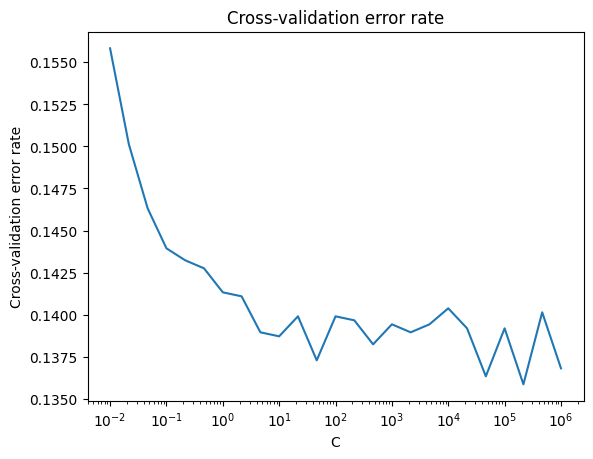

In [56]:
fig, ax = plt.subplots()
ax.plot(Cs, err_rates);
ax.set_xscale('log');
ax.set_xlabel('C');
ax.set_ylabel('Cross-validation error rate');
ax.set_title('Cross-validation error rate');

## Exercise 6

By Theorem 22.26, a $1-\alpha$ confidence interval for $L(h)$ is $\hat{L}(\hat{h}) \pm \epsilon$, where
$$\epsilon = \frac{32}{n} \log\left( \frac{8(n^{d+1} + 1)}{\alpha} \right),$$
where $d$ is the dimension of the feature space.

In [57]:
import math
from scipy.optimize import brentq
from sklearn import datasets

In [58]:
iris = datasets.load_iris()

In [59]:
X = iris.data
y = iris.target

In [60]:
n, d = X.shape

In [61]:
alpha = 0.05

In [62]:
L_hat = np.mean(LinearDiscriminantAnalysis().fit(X, y).predict(X) != iris.target)
eps = np.sqrt(32 / n * np.log(8 * (n ** (d + 1) + 1) / alpha))
(L_hat - eps, L_hat + eps)

(np.float64(-2.5152280753984835), np.float64(2.5552280753984835))

We can see that this confidence interval is not particularly useful.

In fact, we can approximate for large $n$
$$\epsilon_n^2 = \frac{32}{n} \log\left(\frac{8(n^{d+1}+1)}{\alpha}\right) \approx \frac{32}{n} \log(n^{d+1}) = 32(d+1) \frac{\log n}{n}.$$

For the bounds to be useful, we need at least $\epsilon_n \leq 1$, or
$$\frac{\log n}{n} \leq \frac{1}{32(d+1)}.$$

In [63]:
def find_upper(f, start, inc=1, multiplier=2):
    start_val = f(start)
    if start_val == 0:
        return (start, start)
    while True:
        end = start + inc
        end_val = f(end)
        if end_val == 0:
            return (end, end)
        if end_val * start_val < 0:
            return (start, end)
        start = end
        inc *= multiplier

In [64]:
def find_n(d):
    obj = lambda n: np.log(n) / n - 1 / 32 / (d + 1)
    return math.ceil(brentq(obj, *find_upper(obj, 2)))

The minimum number of observation for the bound to be useful:

In [65]:
ds = np.arange(1, 16)
pd.DataFrame({'n': [find_n(d) for d in ds]}, index=pd.Index(ds, name='d'))

,n
d,
1,381
2,617
3,866
4,1124
5,1390
6,1661
7,1938
8,2219
9,2505


## Exercise 7

A linear classifier has a linear decision boundary, which for $\mathbb{R}$ is a point. Thus a linear classifier on $\mathbb{R}$ will classify all observations on one side of the point as belonging to one class and all points on the other side as belonging to the other class.

Suppose $Y_i = 1$ whenever $|X_i| \leq 1$ and $Y_i = 0$ otherwise. Consider any decision boundary $c < 1$. Then all points $X_i > c$ will be classified as belonging to the same class. However, there will be points in the interval $(c, 1)$ for which $Y = 1$ and points in the interval $(1, +\infty)$ for which $Y = 0$, so they cannot be perfectly classified. Consider now a decision boundary $c \geq 1$. Then all points $X < c$ will be classified as belonging to the same class, however among them there will be points in the interval $(-1, 1)$ for which $Y = 1$ and points in the interval $(-\infty, -1)$ for which $Y = 0$, so they cannot be perfectly classified.

Ther kernelised points $Z_i = (X_i, X_i^2)$ can be trivially separated by the classifier
$$h(z_i) = \begin{cases}
1, &\text{if } z_{i,2}^2 \leq 1 \\
0, &\text{otherwise}, \\
\end{cases}$$
where $z_i = (z_{i,1}, z_{i,2})$ with $z_{i,1}=x_i$ and $z_{i,2} = x_i^2$.

## Exercise 8

In [66]:
ps = np.arange(1, 11)
Cs = np.logspace(-2, 6, 25)

In [67]:
%%time
err_rates = 1 - np.array([[cross_val_score(
    estimator=svm.SVC(kernel='poly', degree=p, coef0=1, gamma=1, C=C),
    X=X,
    y=y,
    cv=kf,
    n_jobs=-1,
    scoring='accuracy',
).mean() for C in Cs] for p in ps])

CPU times: user 1.86 s, sys: 54.3 ms, total: 1.91 s
Wall time: 13 s


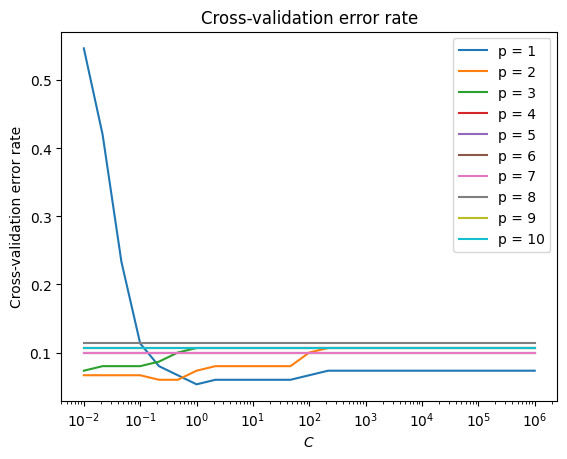

In [68]:
fig, ax = plt.subplots()
for i, p in enumerate(ps):
    ax.plot(Cs, err_rates[i], label=f'p = {p}');
ax.set_xscale('log');
ax.set_xlabel('$C$');
ax.set_ylabel('Cross-validation error rate');
ax.set_title('Cross-validation error rate');
ax.legend();

The smalleest error rate is achieved for $p$:

In [69]:
min_p_idx = np.argmin(np.min(err_rates, axis=1))
ps[min_p_idx]

np.int64(1)

and $C$:

In [70]:
Cs[np.argmin(err_rates[min_p_idx])]

np.float64(1.0)

## Exercise 9

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
ks = np.arange(1, 50)

In [73]:
%%time
err_rates = 1 - np.array([cross_val_score(
    estimator=KNeighborsClassifier(n_neighbors=k, algorithm='brute'),
    X=X,
    y=y,
    cv=kf,
    n_jobs=-1,
    scoring='accuracy',
).mean() for k in ks])

CPU times: user 296 ms, sys: 7.82 ms, total: 304 ms
Wall time: 679 ms


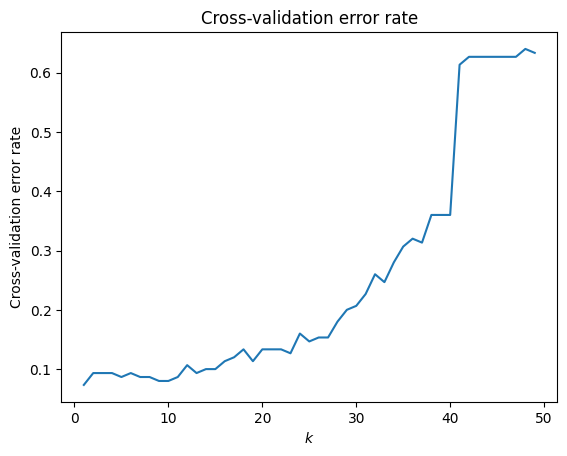

In [74]:
fig, ax = plt.subplots()
ax.plot(ks, err_rates);
ax.set_xlabel('$k$');
ax.set_ylabel('Cross-validation error rate');
ax.set_title('Cross-validation error rate');

The cross-validation error is minimised by using a single neighbour:

In [75]:
ks[np.argmin(err_rates)]

np.int64(1)

## Exercise 10

The probability of a point occurring inside of the sphere of radius $v_d(r)$ centered at the origin is the ratio of the volume of the sphere to the volume of the cube. The cube has unit volume, hence $\mathbb{P}(|X| \leq r) = v_d(r)$.
$$\mathbb{P}(R \leq r) = 1 - \mathbb{P}(R > r) = 1 - \mathbb{P}(\min |X_i| > r) = 1 - \mathbb{P}(\forall i: |X_i| > r) = 1 - \mathbb{P}(|X_i| > r)^n = 1 - (1 - v_d(r))^n.$$
Note that $v_d(r) = r^d v_d(1)$, so
$$\mathbb{P}(R \leq r) = 1 - (1 - r^d v_d(1))^n.$$
At the median we have $\mathbb{P}(R \leq r) = \frac{1}{2}$, leading to
$$\frac{1}{2} = 1 - (1 - r^d v_d(1))^n,$$
which we solve for $r$ to obtain
$$r = \left(\frac{1 - \left(\frac12\right)^{1/n}}{v_d(1)}\right)^{1/d}.$$

We plot $r$ as a function of $n$:

In [76]:
from scipy.special import gamma

In [77]:
def v(d, r):
    return r ** d * np.pi ** (d / 2) / gamma(d / 2 + 1)

In [78]:
def median_r(d, n):
    return ((1 - 0.5 ** (1 / n)) / v(d, 1)) ** (1 / d)

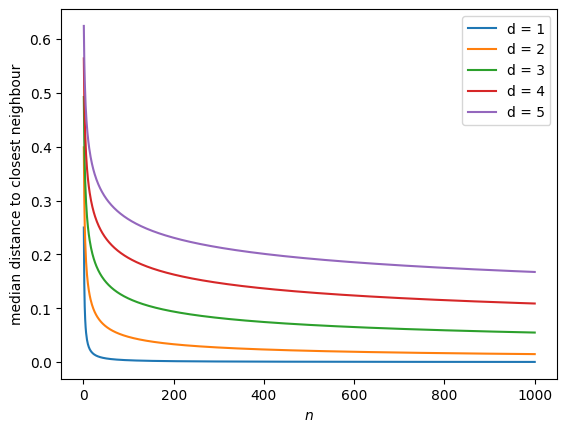

In [79]:
ns = np.arange(1, 1001)
ds = np.arange(1, 6)
fig, ax = plt.subplots()
for d in ds:
    ax.plot(ns, median_r(d, ns), label=f'd = {d}');
ax.set_xlabel('$n$');
ax.set_ylabel('median distance to closest neighbour');
ax.legend();

In [80]:
def find_d(n):
    obj = lambda d: median_r(d, n) - 0.5
    return math.ceil(brentq(obj, *find_upper(obj, 2)))

The dimension $d$ for which the median exceeds the edge of the cube (0.5):

In [81]:
ns = [100, 1000, 10000]
pd.DataFrame({'d': [find_d(n) for n in ns]}, index=pd.Index(ns, name='n'))

,d
n,
100,9
1000,12
10000,14


## Exercise 11

In [82]:
from sklearn.ensemble import BaggingClassifier

In [83]:
data = pd.read_csv('spam.dat', sep='\\s+', header=None)
cluster_col = 57
X = data.drop(columns=cluster_col, axis=1)
y = data.iloc[:, cluster_col]

In [84]:
ms1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 250, 500, 750, 1000, 1500, 2000, 2500], dtype='int64')
ns1 = np.array([2, 5, 10, 20, 50, 100, 200, 500], dtype='int64')

In [85]:
%%time
err_rates = 1 - np.array([[cross_val_score(
    estimator=BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=m), n_estimators=n, n_jobs=-1),
    X=X,
    y=y,
    cv=kf,
    n_jobs=-1,
    scoring='accuracy',
).mean() for m in ms1] for n in ns1])

CPU times: user 3.73 s, sys: 871 ms, total: 4.61 s
Wall time: 11min 49s


In [86]:
ms2 = np.arange(1, 6)
ns2 = np.logspace(1, 4, 20).astype(int)

In [87]:
%%time
err_rates2 = 1 - np.array([[cross_val_score(
    estimator=BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=m), n_estimators=n, n_jobs=-1),
    X=X,
    y=y,
    cv=kf,
    n_jobs=-1,
    scoring='accuracy',
).mean() for m in ms2] for n in ns2])

/home/artem/git/all-of-statistics/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 18.4 s, sys: 6.42 s, total: 24.9 s
Wall time: 2h 53min 30s


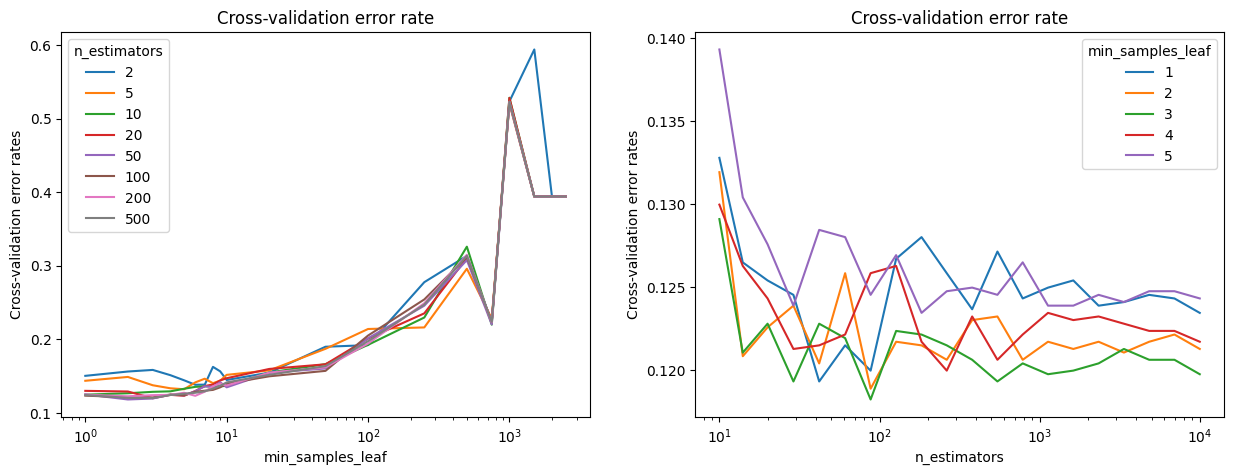

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i_n, n in enumerate(ns1):
    axs[0].plot(ms1, err_rates[i_n], label=f'{n}');
axs[0].set_xlabel('min_samples_leaf');
axs[0].set_ylabel('Cross-validation error rates');
axs[0].set_title('Cross-validation error rate');
axs[0].legend(title='n_estimators');
axs[0].set_xscale('log');

for i_m, m in enumerate(ms2):
    axs[1].plot(ns2, err_rates2[:, i_m], label=f'{m}');
axs[1].set_xlabel('n_estimators');
axs[1].set_ylabel('Cross-validation error rates');
axs[1].set_title('Cross-validation error rate');
axs[1].legend(title='min_samples_leaf');
axs[1].set_xscale('log');

The lowest cross-validation error rate is attained by using 90 estimators with `min_sample_leaf=3`.

## Exercise 12

In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
Js = np.arange(1, 31) * 10

In [96]:
%%time
err_rates = 1 - np.array([cross_val_score(
    estimator=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=J),
    X=X,
    y=y,
    cv=kf,
    n_jobs=-1,
    scoring='accuracy',
).mean() for J in Js])

/home/artem/git/all-of-statistics/.venv/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/artem/git/all-of-statistics/.venv/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/artem/git/all-of-statistics/.venv/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/artem/git/all-of-statistics/.venv/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and w

CPU times: user 660 ms, sys: 140 ms, total: 800 ms
Wall time: 1min 29s


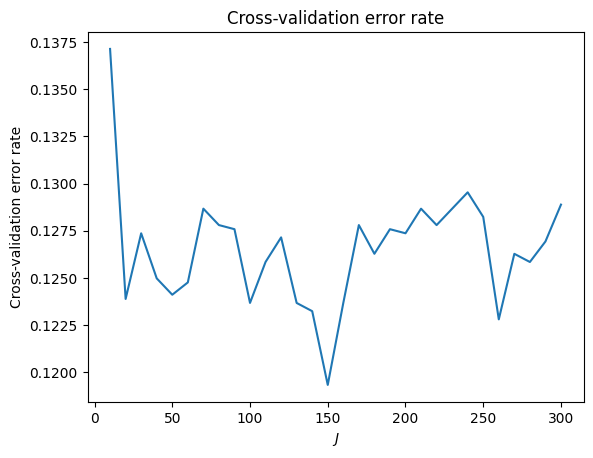

In [97]:
fig, ax = plt.subplots()
ax.plot(Js, err_rates);
ax.set_xlabel('$J$');
ax.set_ylabel('Cross-validation error rate');
ax.set_title('Cross-validation error rate');

There does not appear to be much of a dependency on the number of estimators in this case.

## Exercise 13

We have
$$\begin{split}
\mathbb{P}(Y \neq h^*(x)) 
&= \mathbb{P}(Y = 1, h^*(x) = 0) + \mathbb{P}(Y = 0, h^*(x) = 1) \\
&= \mathbb{P}(Y = 1) \mathbb{P}(h^*(x) = 0) + \mathbb{P}(Y = 0) \mathbb{P}(h^*(x) = 1) \\
&= r(x) \mathbb{P}(h^*(x) = 0) + (1-r(x)) \mathbb{P}(h^*(x) = 1), \\
\end{split}$$
where
$$\mathbb{P}(h^*(x) = 1) = \begin{cases}
1, &\text{if } r(x) \geq \frac{1}{2} \\
0, &\text{if } r(x) < \frac{1}{2} \\
\end{cases}$$
so
$$\begin{split}
\mathbb{P}(Y \neq h^*(x)) = \begin{cases}
1 - r(x), &\text{if } r(x) \geq \frac{1}{2} \\
r(x), &\text{if } r(x) < \frac{1}{2} \\
\end{cases}
\end{split}$$

Now,
$$\begin{split}
\mathbb{P}(Y \neq h(x)) 
&= \mathbb{P}(Y = 1, h(x) = 0) + \mathbb{P}(Y = 0, h(x) = 1) \\
&= \mathbb{P}(Y = 1) \mathbb{P}(h(x) = 0) + \mathbb{P}(Y = 0) \mathbb{P}(h(x) = 1) \\
&= r(x) \mathbb{P}\left(\hat{r}(x) < \frac{1}{2}\right) + (1-r(x)) \mathbb{P}\left(\hat{r}(x) \geq \frac{1}{2}\right) \\
&\approx r(x) \Phi\left(\frac{\frac{1}{2} - \overline{r}(x)}{\sigma(x)}\right) + (1-r(x)) \left(1 - \Phi\left(\frac{\frac{1}{2} - \overline{r}(x)}{\sigma(x)}\right)\right) \\
&= (1 - r(x)) + r(x) \Phi\left(\frac{\frac{1}{2} - \overline{r}(x)}{\sigma(x)}\right) - (1-r(x))\Phi\left(\frac{\frac{1}{2} - \overline{r}(x)}{\sigma(x)}\right) \\
&= (1 - r(x)) + (2 r(x) - 1) \Phi\left(\frac{\frac{1}{2} - \overline{r}(x)}{\sigma(x)}\right) \\
&= (1 - r(x)) + (2 r(x) - 1) \left(1 - \Phi\left(\frac{\overline{r}(x) - \frac{1}{2}}{\sigma(x)}\right)\right) \\
&= \mathbb{P}(Y \neq h^*(x)) + |2 r(x) - 1| \left(1 - \Phi\left(\text{sign}\left(r(x) - \frac{1}{2}\right)\frac{\overline{r}(x) - \frac{1}{2}}{\sigma(x)}\right)\right) \\
\end{split}$$
when $r(x) \geq \frac{1}{2}$. Also,
$$\begin{split}
\mathbb{P}(Y \neq h(x)) 
&= (1 - r(x)) + (2 r(x) - 1) \left(1 - \Phi\left(\frac{\overline{r}(x) - \frac{1}{2}}{\sigma(x)}\right)\right) \\
&= r(x) - (2r(x) - 1) + (2 r(x) - 1) \left(1 - \Phi\left(\frac{\overline{r}(x) - \frac{1}{2}}{\sigma(x)}\right)\right) \\
&= r(x) - (2 r(x) - 1) \Phi\left(\frac{\overline{r}(x) - \frac{1}{2}}{\sigma(x)}\right) \\
&= r(x) - (2 r(x) - 1) \left(1 - \Phi\left(-\frac{\overline{r}(x) - \frac{1}{2}}{\sigma(x)}\right)\right) \\
&= \mathbb{P}(Y \neq h^*(x)) + |2 r(x) - 1| \left(1 - \Phi\left(\text{sign}\left(r(x) - \frac{1}{2}\right)\frac{\overline{r}(x) - \frac{1}{2}}{\sigma(x)}\right)\right) \\
\end{split}$$
when $r(x) < \frac{1}{2}$. In both cases, we have
$$\mathbb{P}(Y \neq h(x))  = \mathbb{P}(Y \neq h^*(x)) + |2 r(x) - 1| \left(1 - \Phi\left(\text{sign}\left(r(x) - \frac{1}{2}\right)\frac{\overline{r}(x) - \frac{1}{2}}{\sigma(x)}\right)\right).$$